#ANÁLISIS DE SENTIMIENTOS

ANDREA BENÍTEZ PINEDA

##Acerca del conjunto de datos

Este conjunto de datos contiene un archivo CSV relacionado con ChatGPT que incluye palabras clave (chatgpt, chat gpt) #hashtags y @mentions sobre ChatGPT. Modelo de IA conversacional de OpenAI. El archivo incluye información sobre 500.000 tweets. El conjunto de datos tiene como objetivo ayudar a comprender la opinión pública, las tendencias y las posibles aplicaciones de ChatGPT mediante el análisis del volumen de tweets, el sentimiento, la participación del usuario y la influencia de los eventos clave de IA. El conjunto de datos ofrece información valiosa para empresas, investigadores y responsables políticos, lo que les permite tomar decisiones informadas y dar forma al futuro de las tecnologías conversacionales impulsadas por IA.

Este conjunto de datos contiene las siguientes columnas:

* **Fecha** - Fecha del tweet.
* **id** - Un identificador único para cada tweet.
* **content** - Contenido del tweet.
* **nombre de ususario** - Nombre de usuario de la persona que tuiteó.
* **like_count** - El número de likes recibidos por el tweet.
* **retweet_count**- El número de veces que el tweet fue retuiteado.


Link:

https://www.kaggle.com/datasets/khalidryder777/500k-chatgpt-tweets-jan-mar-2023


##1. Conjunto de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from zipfile import ZipFile
import pandas as pd


#archivo = "/content/drive/MyDrive/Colab Notebooks/Twitter Jan Mar.csv.zip"

archivo ="/content/drive/MyDrive/Twitter Jan Mar.csv.zip"

print('Extrayendo contenido...')
with ZipFile(archivo, 'r') as Zip:
    Zip.extractall()
    print('Extracción finalizada.')

df = pd.read_csv("Twitter Jan Mar.csv")

Extrayendo contenido...
Extracción finalizada.


In [ ]:
df

,date,id,content,username,like_count,retweet_count
0,2023-03-29 22:58:21+00:00,1641213230730051584,"Free AI marketing and automation tools, strate...",RealProfitPros,0.0,0.0
1,2023-03-29 22:58:18+00:00,1641213218520481805,@MecoleHardman4 Chat GPT says it’s 15. 😂,AmyLouWho321,0.0,0.0
2,2023-03-29 22:57:53+00:00,1641213115684536323,https://t.co/FjJSprt0te - Chat with any PDF!\n...,yjleon1976,0.0,0.0
3,2023-03-29 22:57:52+00:00,1641213110915571715,"AI muses: ""In the court of life, we must all f...",ChatGPT_Thinks,0.0,0.0
4,2023-03-29 22:57:26+00:00,1641213003260633088,Most people haven't heard of Chat GPT yet.\nFi...,nikocosmonaut,0.0,0.0
...,...,...,...,...,...,...
500031,2023-01-04 07:18:08+00:00,1610536038094757888,@GoogleAI #LAMDA Versus @OpenAI #ChatGPT ?! Wh...,Pup_In_Cup,1.0,0.0
500032,2023-01-04 07:17:50+00:00,1610535961670172674,#ChatGPT \n\nSo much #Censorship.\n\nNever tru...,TryingToOffend,2.0,0.0
500033,2023-01-04 07:17:20+00:00,1610535837363486720,all my twitter feed is about ChatGPT and @Open...,mcp350,3.0,1.0
500034,2023-01-04 07:17:08+00:00,1610535786017091584,I'm quite amazed by Chat GPT. A really promisi...,manumurali369,1.0,0.0


##Limpieza de datos

In [ ]:
#Veamos si hay datos duplicados
duplicated = df.duplicated().sum()
print(f' {duplicated} filas duplicadas.')


 0 filas duplicadas.


In [ ]:
#Veamos si hay valores faltantes.
df.isnull().sum()

date              0
id                6
content           6
username         34
like_count       62
retweet_count    62
dtype: int64

In [ ]:
#Eliminar las filas que contienen uno o más datos faltantes, dejando solo registros completos.

df= df.dropna()

###Clasificación de los datos
Extraemos los tweets que contienen iconos que representan sentimientos para clasificar.

In [ ]:
#28
positivos_icons = '😁|😂|😃|😄|😅|😆|😉|😊|😍|🤩|❤️|👍|😇|🤓|🥰|🤠|🫰|💕|🎉|🎊|😌|🤩|🥳|😺|😸|😻|🌈'

positivos= pd.Series(df['content'], dtype="string", name="positivos").str.contains(positivos_icons)
positivos.sum()

21072

In [ ]:
#31
negativos_icons = '😓|😖|😢|😭|😰|😱|🙍|🙎|😞|🥺|😧|💧|🫤|🫥|😾|👎|🤨|🤢|🤮|👿|👺|😧|😞|💩|😡|🤬|🤯|👎|💔|💀|☠️'

negativos = pd.Series(df['content'], dtype="string", name="negativos").str.contains(negativos_icons)
negativos.sum()

7271

In [ ]:
#unimos resultados
df1=pd.concat([df['id'],df['content'], positivos,negativos], axis=1)
df1

,id,content,positivos,negativos
0,1641213230730051584,"Free AI marketing and automation tools, strate...",False,False
1,1641213218520481805,@MecoleHardman4 Chat GPT says it’s 15. 😂,True,False
2,1641213115684536323,https://t.co/FjJSprt0te - Chat with any PDF!\n...,False,False
3,1641213110915571715,"AI muses: ""In the court of life, we must all f...",False,False
4,1641213003260633088,Most people haven't heard of Chat GPT yet.\nFi...,False,False
...,...,...,...,...
500031,1610536038094757888,@GoogleAI #LAMDA Versus @OpenAI #ChatGPT ?! Wh...,False,False
500032,1610535961670172674,#ChatGPT \n\nSo much #Censorship.\n\nNever tru...,False,False
500033,1610535837363486720,all my twitter feed is about ChatGPT and @Open...,True,False
500034,1610535786017091584,I'm quite amazed by Chat GPT. A really promisi...,True,False


In [ ]:
#Clasificamos los textos que contienen las categorias
texts_classified = df1[(df1['positivos'] | df1['negativos'] )]

texts_no_classified = df1[~(df1['positivos'] )]['content']

In [ ]:
#limpiamos los que tienen ambas categorias
count = texts_classified.apply(lambda row: row['positivos'] + row['negativos'] , axis=1)
count = count.rename("count")

In [ ]:
texts_classified = pd.concat([texts_classified, count], axis=1)

In [ ]:
texts_classified = texts_classified[texts_classified['count'] == 1]
texts_classified

,id,content,positivos,negativos,count
1,1641213218520481805,@MecoleHardman4 Chat GPT says it’s 15. 😂,True,False,1
8,1641212856984109072,Yours Robotically - by Shaun Usher - Letters o...,True,False,1
43,1641210743369396225,@nertilqatja @michael_dehart @greg16676935420 ...,False,True,1
48,1641210371037097984,I asked Chat GPT about defensive football. \n\...,False,True,1
84,1641208764161306627,not me demanding chat gpt to write corny fanfi...,False,True,1
...,...,...,...,...,...
499975,1610542918309220353,@DataChaz Did you ask #chatGPT for an explanat...,True,False,1
499978,1610542537592246272,Do you want to use #chatGPT like a Pro? \nFoll...,True,False,1
500024,1610537189590564864,Just managed to convince BiL to check out #cha...,True,False,1
500033,1610535837363486720,all my twitter feed is about ChatGPT and @Open...,True,False,1


In [ ]:
#Agregamos la columna target
def label_feeling (row):
   if row['positivos'] :
      return 0
   if row['negativos'] :
      return 1


texts_classified['target'] = texts_classified.apply(lambda row: label_feeling(row), axis=1)
texts_classified

,id,content,positivos,negativos,count,target
1,1641213218520481805,@MecoleHardman4 Chat GPT says it’s 15. 😂,True,False,1,0
8,1641212856984109072,Yours Robotically - by Shaun Usher - Letters o...,True,False,1,0
43,1641210743369396225,@nertilqatja @michael_dehart @greg16676935420 ...,False,True,1,1
48,1641210371037097984,I asked Chat GPT about defensive football. \n\...,False,True,1,1
84,1641208764161306627,not me demanding chat gpt to write corny fanfi...,False,True,1,1
...,...,...,...,...,...,...
499975,1610542918309220353,@DataChaz Did you ask #chatGPT for an explanat...,True,False,1,0
499978,1610542537592246272,Do you want to use #chatGPT like a Pro? \nFoll...,True,False,1,0
500024,1610537189590564864,Just managed to convince BiL to check out #cha...,True,False,1,0
500033,1610535837363486720,all my twitter feed is about ChatGPT and @Open...,True,False,1,0


In [ ]:
#Nos quedamos con las columnas del usuario, tweets y target
texts_classified = texts_classified[['id','content' ,'target']]
texts_classified.head()

,id,content,target
1,1641213218520481805,@MecoleHardman4 Chat GPT says it’s 15. 😂,0
8,1641212856984109072,Yours Robotically - by Shaun Usher - Letters o...,0
43,1641210743369396225,@nertilqatja @michael_dehart @greg16676935420 ...,1
48,1641210371037097984,I asked Chat GPT about defensive football. \n\...,1
84,1641208764161306627,not me demanding chat gpt to write corny fanfi...,1


In [ ]:
texts_classified['target'].value_counts()

0    20455
1     6654
Name: target, dtype: int64

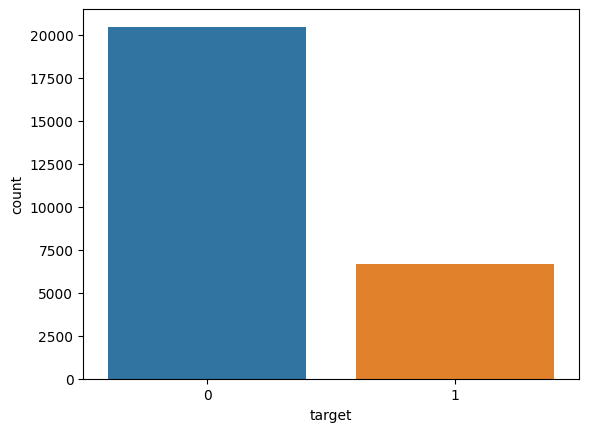

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure()
sns.countplot(x = "target", data = texts_classified)
plt.show()

##Submuestreo

In [ ]:
positivos_target = texts_classified[texts_classified['target'] == 0].sample(6654)
negativos_target = texts_classified[texts_classified['target'] == 1].sample(6654)


In [ ]:
datos_balanceados = pd.concat([positivos_target,negativos_target], ignore_index=True)
datos_balanceados

,id,content,target
0,1620709814958702592,Would anyone have an idea of the times when Ch...,0
1,1630672036061143042,ADA News: AI #Altcoin Based on #Cardano (#ADA)...,0
2,1617213941708427264,Chat GPT told me the town/city most similar to...,0
3,1631464786532896770,Powerful 👍🏻 ChatGPT Video Generator 🎥See how y...,0
4,1617699997881110530,"@ksorbs I agree. To end a human life, at any s...",0
...,...,...,...
13303,1635941985184890884,Chat GPT n me … call it forbidden love 🥺 https...,1
13304,1626764547108511745,Using #ChatGPT jailbreaks=anarchist cookbook o...,1
13305,1639960812759531523,This #ChatGPT bollox reminds me to value Libra...,1
13306,1622120855617802241,@JagjotS40616574 #Ban_Chat_GPT\n#Boycott_Chat_...,1


###Limpieza de texto

---



In [ ]:
#@title Bajamos los datos de nltk
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
#@title Función para limpiar el texto
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

CLEANR = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def preprocesar_textos(docs,ignore_list:list=[]):
    strings_list = [re.sub(CLEANR, '', x.lower()) for x in docs]
    strings_list = [re.sub(r'[^\w\s]', '', x.lower()) for x in docs]  # quita signos de puntuación
    strings_list = [re.sub('[0-9]', '', x.lower()) for x in strings_list] # quita números
    SW = stopwords.words('english')
    for x in ignore_list: # quitamos stopwords
        SW.remove(x)
    tokens_no_sw = [lemmatizer.lemmatize(token) for token in strings_list ]
    tokens_no_sw = [" ".join([word for word in word_tokenize(text) if not word in SW]) for
                         text in tokens_no_sw ]
    return tokens_no_sw


In [ ]:
datos_balanceados['clean']=preprocesar_textos(datos_balanceados['content'])


In [ ]:
datos_balanceados

,id,content,target,clean
0,1620709814958702592,Would anyone have an idea of the times when Ch...,0,would anyone idea times chat gpt full capacity...
1,1630672036061143042,ADA News: AI #Altcoin Based on #Cardano (#ADA)...,0,ada news ai altcoin based cardano ada rallies ...
2,1617213941708427264,Chat GPT told me the town/city most similar to...,0,chat gpt told towncity similar randolph brockt...
3,1631464786532896770,Powerful 👍🏻 ChatGPT Video Generator 🎥See how y...,0,powerful chatgpt video generator see scale vid...
4,1617699997881110530,"@ksorbs I agree. To end a human life, at any s...",0,ksorbs agree end human life stage constitutes ...
...,...,...,...,...
13303,1635941985184890884,Chat GPT n me … call it forbidden love 🥺 https...,1,chat gpt n call forbidden love httpstcoydljquzxt
13304,1626764547108511745,Using #ChatGPT jailbreaks=anarchist cookbook o...,1,using chatgpt jailbreaksanarchist cookbook ste...
13305,1639960812759531523,This #ChatGPT bollox reminds me to value Libra...,1,chatgpt bollox reminds value librarians librar...
13306,1622120855617802241,@JagjotS40616574 #Ban_Chat_GPT\n#Boycott_Chat_...,1,jagjots ban_chat_gpt boycott_chat_gpt pmoindia...


In [ ]:
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))

    return df

In [ ]:
clean_text(datos_balanceados, 'clean')
datos_balanceados.head()

,id,content,target,clean
0,1620709814958702592,Would anyone have an idea of the times when Ch...,0,would anyone idea times chat gpt full capacity...
1,1630672036061143042,ADA News: AI #Altcoin Based on #Cardano (#ADA)...,0,ada news ai altcoin based cardano ada rallies ...
2,1617213941708427264,Chat GPT told me the town/city most similar to...,0,chat gpt told towncity similar randolph brockt...
3,1631464786532896770,Powerful 👍🏻 ChatGPT Video Generator 🎥See how y...,0,powerful chatgpt video generator see scale vid...
4,1617699997881110530,"@ksorbs I agree. To end a human life, at any s...",0,ksorbs agree end human life stage constitutes ...


Guardemos el modelo para no volver a limpiarlo

In [ ]:
datos_balanceados.to_pickle('twitter-procesado.pickle')

In [ ]:
import pandas as pd

df = pd.read_pickle('/content/twitter-procesado.pickle')
df

,id,content,target,clean
0,1620709814958702592,Would anyone have an idea of the times when Ch...,0,would anyone idea times chat gpt full capacity...
1,1630672036061143042,ADA News: AI #Altcoin Based on #Cardano (#ADA)...,0,ada news ai altcoin based cardano ada rallies ...
2,1617213941708427264,Chat GPT told me the town/city most similar to...,0,chat gpt told towncity similar randolph brockt...
3,1631464786532896770,Powerful 👍🏻 ChatGPT Video Generator 🎥See how y...,0,powerful chatgpt video generator see scale vid...
4,1617699997881110530,"@ksorbs I agree. To end a human life, at any s...",0,ksorbs agree end human life stage constitutes ...
...,...,...,...,...
13303,1635941985184890884,Chat GPT n me … call it forbidden love 🥺 https...,1,chat gpt n call forbidden love tcoydljquzxt
13304,1626764547108511745,Using #ChatGPT jailbreaks=anarchist cookbook o...,1,using chatgpt jailbreaksanarchist cookbook ste...
13305,1639960812759531523,This #ChatGPT bollox reminds me to value Libra...,1,chatgpt bollox reminds value librarians librar...
13306,1622120855617802241,@JagjotS40616574 #Ban_Chat_GPT\n#Boycott_Chat_...,1,jagjots banchatgpt boycottchatgpt pmoindia ami...


## Clasificación (Análisis de Sentimientos)




---


### MLP


---



In [ ]:
y=df['target'].values



---


### CountVectorizer


---



Usaremos el modelo BOW de conteos de ocurrencias de palabras que hemos usado para generar features de texto, usaremos el `CountVectorizer` de scikit-learn.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

docs_list = df['clean'].values

count_vectorizer = CountVectorizer(stop_words='english',
                                    max_features=800)
X_counts = count_vectorizer.fit_transform(docs_list)
X_counts =  np.asarray(X_counts.todense())
print(X_counts.shape)
#(filas,features(palabras))



(13308, 800)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_counts, y, random_state=64, train_size=0.8, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (10646, 800)
Shape of X_test: (2662, 800)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Definimos el modelo

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(50,input_dim=800,activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(800, activation='LeakyReLU'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))



model.compile(optimizer='adamax',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                40050     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 800)               40800     
                                                                 
 dropout_1 (Dropout)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 801       
                                                                 
Total params: 81,651
Trainable params: 81,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',mode='min',patience=4,verbose=1)

In [ ]:
history = model.fit(X_train,y_train,validation_split=0.1,epochs=30,
                    callbacks=[es])

Epoch 1/30
300/300 [==============================] - 3s 4ms/step - loss: 0.7534 - accuracy: 0.5010 - val_loss: 0.6910 - val_accuracy: 0.5399
Epoch 2/30
300/300 [==============================] - 1s 4ms/step - loss: 0.7342 - accuracy: 0.5130 - val_loss: 0.6872 - val_accuracy: 0.5277
Epoch 3/30
300/300 [==============================] - 1s 4ms/step - loss: 0.7194 - accuracy: 0.5212 - val_loss: 0.6894 - val_accuracy: 0.5305
Epoch 4/30
300/300 [==============================] - 1s 4ms/step - loss: 0.7149 - accuracy: 0.5181 - val_loss: 0.6850 - val_accuracy: 0.5493
Epoch 5/30
300/300 [==============================] - 1s 5ms/step - loss: 0.7085 - accuracy: 0.5303 - val_loss: 0.6850 - val_accuracy: 0.5484
Epoch 6/30
300/300 [==============================] - 2s 5ms/step - loss: 0.6993 - accuracy: 0.5431 - val_loss: 0.6801 - val_accuracy: 0.5624
Epoch 7/30
300/300 [==============================] - 1s 5ms/step - loss: 0.6933 - accuracy: 0.5496 - val_loss: 0.6770 - val_accuracy: 0.5822
Epoch 

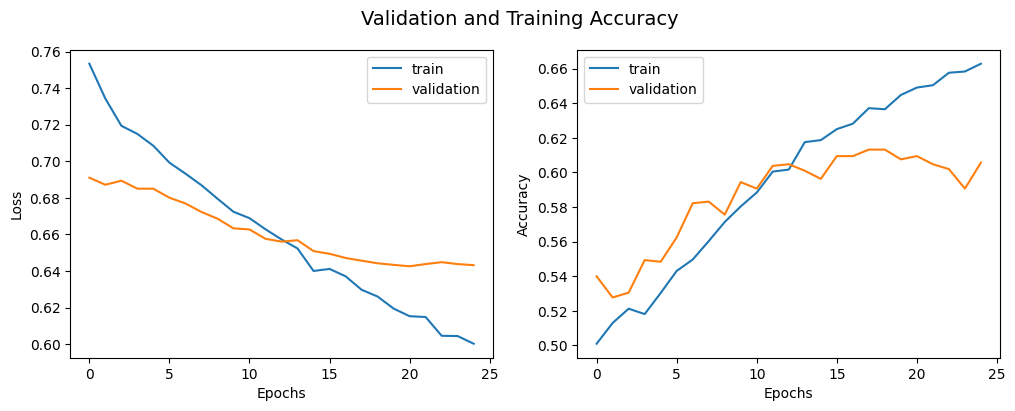

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4),dpi=100)
plt.suptitle("Training Curves",fontsize=16)
plt.subplot(1, 2, 1)
plt.suptitle("Validation and Training Loss",fontsize=14)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.subplot(1, 2, 2)
plt.suptitle("Validation and Training Accuracy",fontsize=14)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, recall_score,precision_score, confusion_matrix

predictions = model.predict(X_test)

pred_labels = []

for x in predictions:
    if x >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)

test_accuracy = accuracy_score(y_test,pred_labels)
test_recall = recall_score(y_test,pred_labels)
print(f"Test Accuracy: {round(test_accuracy,3)}")
print(f"Test Recall: {round(test_recall,3)}")
print(f"Test Precision: {precision_score(y_test,pred_labels)}")

print("\nConfusion Matrix:\n",confusion_matrix(y_test,pred_labels))

84/84 [==============================] - 0s 1ms/step
Test Accuracy: 0.614
Test Recall: 0.47
Test Precision: 0.6606765327695561

Confusion Matrix:
 [[1010  321]
 [ 706  625]]


<Figure size 10x10 with 0 Axes>

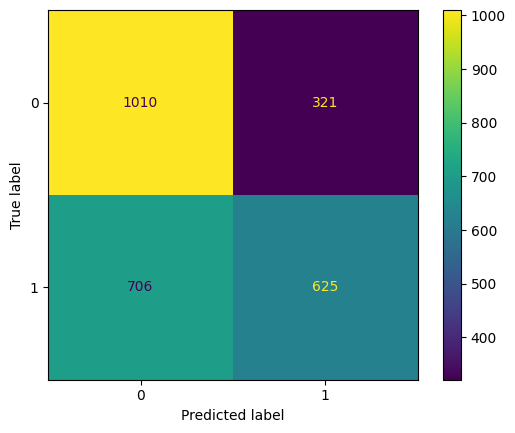

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize=(.1,.1))
#sns.heatmap(cm,cmap='plasma',annot=True)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,pred_labels), display_labels = ['0', '1' ])
cm_display.plot()
plt.show()

##Veamos el score ROC-AUC

In [ ]:
from sklearn.metrics import roc_auc_score

predictions_matrix = model.predict(X_test)
print(f"Shape de y_test: {y_test.shape}")
print(f"Shape de las predicciones para el conjunto de prueba: {predictions_matrix.shape}")

roc_auc_score(y_test,predictions_matrix)

84/84 [==============================] - 0s 1ms/step
Shape de y_test: (2662,)
Shape de las predicciones para el conjunto de prueba: (2662, 1)


0.6632131210836093



---

###PCA


---



In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
X_train= pca.fit_transform(X_train)
X_test = pca.transform(X_test)

Definimos el modelo

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(50,input_dim=100,activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(800, activation='LeakyReLU'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))



model.compile(optimizer='adamax',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 800)               40800     
                                                                 
 dropout_3 (Dropout)         (None, 800)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 801       
                                                                 
Total params: 46,651
Trainable params: 46,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',mode='min',patience=4,verbose=1)

In [ ]:
history = model.fit(X_train,y_train,validation_split=0.1,epochs=35,
                    callbacks=[es])

Epoch 1/35
300/300 [==============================] - 7s 9ms/step - loss: 0.7481 - accuracy: 0.5144 - val_loss: 0.6857 - val_accuracy: 0.5390
Epoch 2/35
300/300 [==============================] - 2s 6ms/step - loss: 0.7350 - accuracy: 0.5218 - val_loss: 0.6806 - val_accuracy: 0.5474
Epoch 3/35
300/300 [==============================] - 2s 7ms/step - loss: 0.7314 - accuracy: 0.5189 - val_loss: 0.6745 - val_accuracy: 0.5831
Epoch 4/35
300/300 [==============================] - 2s 7ms/step - loss: 0.7170 - accuracy: 0.5257 - val_loss: 0.6778 - val_accuracy: 0.5549
Epoch 5/35
300/300 [==============================] - 1s 4ms/step - loss: 0.7165 - accuracy: 0.5223 - val_loss: 0.6710 - val_accuracy: 0.5962
Epoch 6/35
300/300 [==============================] - 1s 4ms/step - loss: 0.7069 - accuracy: 0.5281 - val_loss: 0.6726 - val_accuracy: 0.5549
Epoch 7/35
300/300 [==============================] - 2s 5ms/step - loss: 0.7045 - accuracy: 0.5339 - val_loss: 0.6699 - val_accuracy: 0.5812
Epoch 

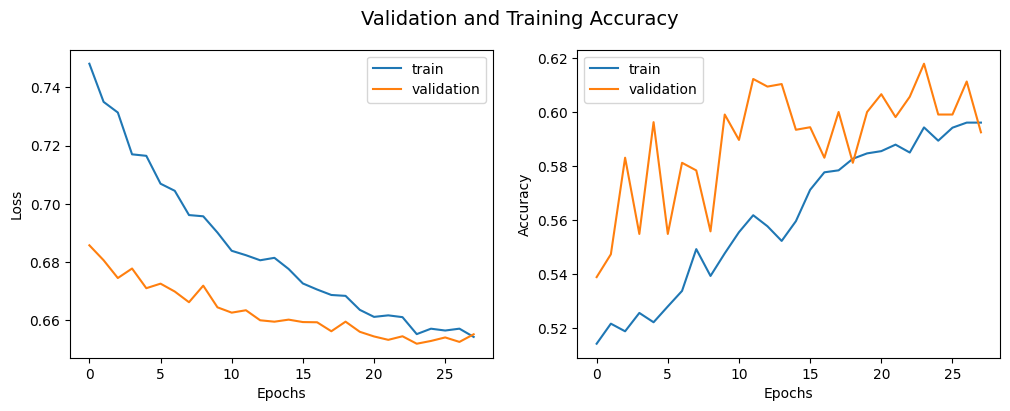

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4),dpi=100)
plt.suptitle("Training Curves",fontsize=16)
plt.subplot(1, 2, 1)
plt.suptitle("Validation and Training Loss",fontsize=14)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.subplot(1, 2, 2)
plt.suptitle("Validation and Training Accuracy",fontsize=14)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, recall_score,precision_score, confusion_matrix

predictions = model.predict(X_test)

pred_labels = []

for x in predictions:
    if x >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)

test_accuracy = accuracy_score(y_test,pred_labels)
test_recall = recall_score(y_test,pred_labels)
print(f"Test Accuracy: {round(test_accuracy,3)}")
print(f"Test Recall: {round(test_recall,3)}")
print(f"Test Precision: {precision_score(y_test,pred_labels)}")

print("\nConfusion Matrix:\n",confusion_matrix(y_test,pred_labels))

84/84 [==============================] - 0s 2ms/step
Test Accuracy: 0.587
Test Recall: 0.329
Test Precision: 0.6801242236024845

Confusion Matrix:
 [[1125  206]
 [ 893  438]]


<Figure size 10x10 with 0 Axes>

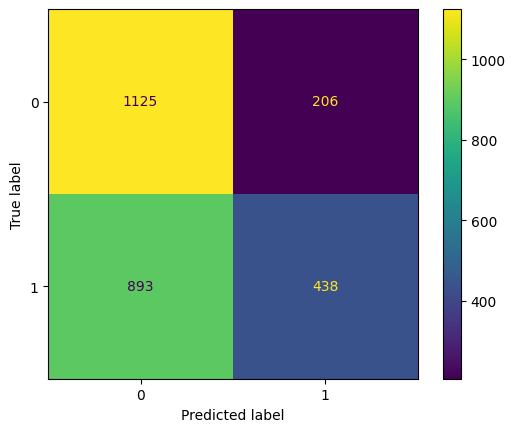

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize=(.1,.1))
#sns.heatmap(cm,cmap='plasma',annot=True)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,pred_labels), display_labels = ['0', '1' ])
cm_display.plot()
plt.show()

##Veamos el score ROC-AUC

In [ ]:
from sklearn.metrics import roc_auc_score

predictions_matrix = model.predict(X_test)
print(f"Shape de y_test: {y_test.shape}")
print(f"Shape de las predicciones para el conjunto de prueba: {predictions_matrix.shape}")

roc_auc_score(y_test,predictions_matrix)

84/84 [==============================] - 0s 2ms/step
Shape de y_test: (2662,)
Shape de las predicciones para el conjunto de prueba: (2662, 1)


0.65177970163037



---


###**TF-IDF**


---



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

topn_words = 800
docs_list = df['clean'].values

vectorizer = TfidfVectorizer(stop_words='english',
                             max_features=topn_words)
X_tfidf = vectorizer.fit_transform(docs_list)
X_tfidf = np.asarray(X_tfidf.todense())
print(X_tfidf.shape)

(13308, 800)


In [ ]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_tfidf,y,train_size=0.8,random_state=189,stratify=y)

print(f"Train size: {X_train2.shape[0]}")
print(f"Test size: {X_test2.shape[0]}")


Train size: 10646
Test size: 2662


In [ ]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

Definimos el modelo

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(50,input_dim=800,activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(800, activation='LeakyReLU'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))



model.compile(optimizer='adamax',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                40050     
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 800)               40800     
                                                                 
 dropout_5 (Dropout)         (None, 800)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 801       
                                                                 
Total params: 81,651
Trainable params: 81,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',mode='min',patience=4,verbose=1)

In [ ]:
history = model.fit(X_train2,y_train2,validation_split=0.1,epochs=35,
                    callbacks=[es])

Epoch 1/35
300/300 [==============================] - 2s 4ms/step - loss: 0.7534 - accuracy: 0.4974 - val_loss: 0.7014 - val_accuracy: 0.4977
Epoch 2/35
300/300 [==============================] - 1s 4ms/step - loss: 0.7304 - accuracy: 0.5117 - val_loss: 0.6936 - val_accuracy: 0.5164
Epoch 3/35
300/300 [==============================] - 1s 4ms/step - loss: 0.7219 - accuracy: 0.5116 - val_loss: 0.6896 - val_accuracy: 0.5362
Epoch 4/35
300/300 [==============================] - 1s 4ms/step - loss: 0.7130 - accuracy: 0.5180 - val_loss: 0.6916 - val_accuracy: 0.5268
Epoch 5/35
300/300 [==============================] - 1s 4ms/step - loss: 0.7065 - accuracy: 0.5206 - val_loss: 0.6868 - val_accuracy: 0.5484
Epoch 6/35
300/300 [==============================] - 1s 4ms/step - loss: 0.6967 - accuracy: 0.5366 - val_loss: 0.6867 - val_accuracy: 0.5559
Epoch 7/35
300/300 [==============================] - 1s 4ms/step - loss: 0.6915 - accuracy: 0.5537 - val_loss: 0.6802 - val_accuracy: 0.5634
Epoch 

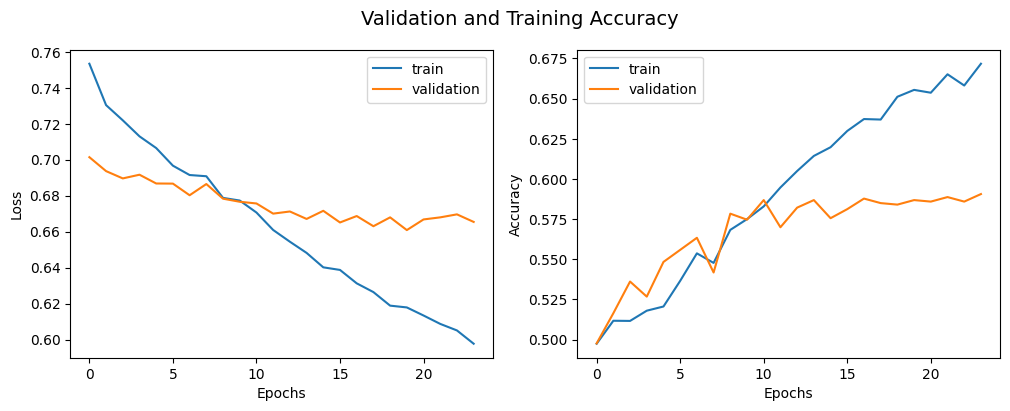

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4),dpi=100)
plt.suptitle("Training Curves",fontsize=16)
plt.subplot(1, 2, 1)
plt.suptitle("Validation and Training Loss",fontsize=14)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.subplot(1, 2, 2)
plt.suptitle("Validation and Training Accuracy",fontsize=14)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, recall_score,precision_score, confusion_matrix

predictions2 = model.predict(X_test2)

pred_labels2 = []

for x in predictions:
    if x >= 0.5:
        pred_labels2.append(1)
    else:
        pred_labels2.append(0)

test_accuracy = accuracy_score(y_test2,pred_labels2)
test_recall = recall_score(y_test2,pred_labels2)
print(f"Test Accuracy: {round(test_accuracy,3)}")
print(f"Test Recall: {round(test_recall,3)}")
print(f"Test Precision: {precision_score(y_test2,pred_labels2)}")

print("\nConfusion Matrix:\n",confusion_matrix(y_test2,pred_labels2))

84/84 [==============================] - 0s 1ms/step
Test Accuracy: 0.505
Test Recall: 0.246
Test Precision: 0.5093167701863354

Confusion Matrix:
 [[1015  316]
 [1003  328]]


<Figure size 10x10 with 0 Axes>

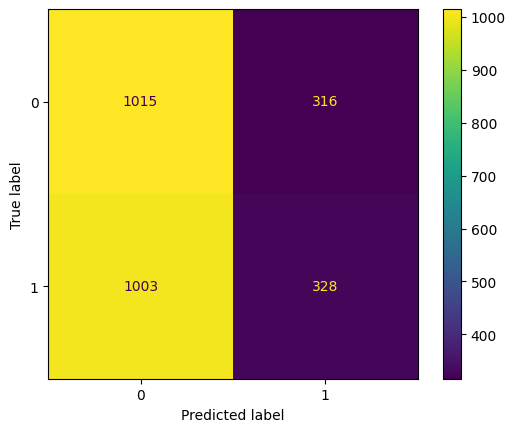

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize=(.1,.1))
#sns.heatmap(cm,cmap='plasma',annot=True)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test2,pred_labels2), display_labels = ['0', '1' ])
cm_display.plot()
plt.show()

##Veamos el score ROC-AUC

In [ ]:
from sklearn.metrics import roc_auc_score

predictions_matrix = model.predict(X_test2)
print(f"Shape de y_test: {y_test2.shape}")
print(f"Shape de las predicciones para el conjunto de prueba: {predictions_matrix.shape}")

roc_auc_score(y_test2,predictions_matrix)

84/84 [==============================] - 0s 1ms/step
Shape de y_test: (2662,)
Shape de las predicciones para el conjunto de prueba: (2662, 1)


0.6767946460776683



---

###PCA


---



In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
X_train2= pca.fit_transform(X_train2)
X_test2 = pca.transform(X_test2)

Definimos el modelo

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(50,input_dim=100,activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(800, activation='LeakyReLU'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))



model.compile(optimizer='adamax',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                5050      
                                                                 
 dropout_6 (Dropout)         (None, 50)                0         
                                                                 
 dense_10 (Dense)            (None, 800)               40800     
                                                                 
 dropout_7 (Dropout)         (None, 800)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 801       
                                                                 
Total params: 46,651
Trainable params: 46,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',mode='min',patience=4,verbose=1)

In [ ]:
history = model.fit(X_train2,y_train2,validation_split=0.1,epochs=35,
                    callbacks=[es])

Epoch 1/35
300/300 [==============================] - 2s 4ms/step - loss: 0.7436 - accuracy: 0.5149 - val_loss: 0.6857 - val_accuracy: 0.5183
Epoch 2/35
300/300 [==============================] - 1s 4ms/step - loss: 0.7285 - accuracy: 0.5148 - val_loss: 0.6782 - val_accuracy: 0.5681
Epoch 3/35
300/300 [==============================] - 1s 4ms/step - loss: 0.7211 - accuracy: 0.5193 - val_loss: 0.6761 - val_accuracy: 0.5493
Epoch 4/35
300/300 [==============================] - 2s 5ms/step - loss: 0.7112 - accuracy: 0.5231 - val_loss: 0.6769 - val_accuracy: 0.5615
Epoch 5/35
300/300 [==============================] - 2s 5ms/step - loss: 0.7045 - accuracy: 0.5297 - val_loss: 0.6775 - val_accuracy: 0.5756
Epoch 6/35
300/300 [==============================] - 1s 4ms/step - loss: 0.7019 - accuracy: 0.5370 - val_loss: 0.6799 - val_accuracy: 0.5474
Epoch 7/35
300/300 [==============================] - 1s 4ms/step - loss: 0.7006 - accuracy: 0.5319 - val_loss: 0.6732 - val_accuracy: 0.5897
Epoch 

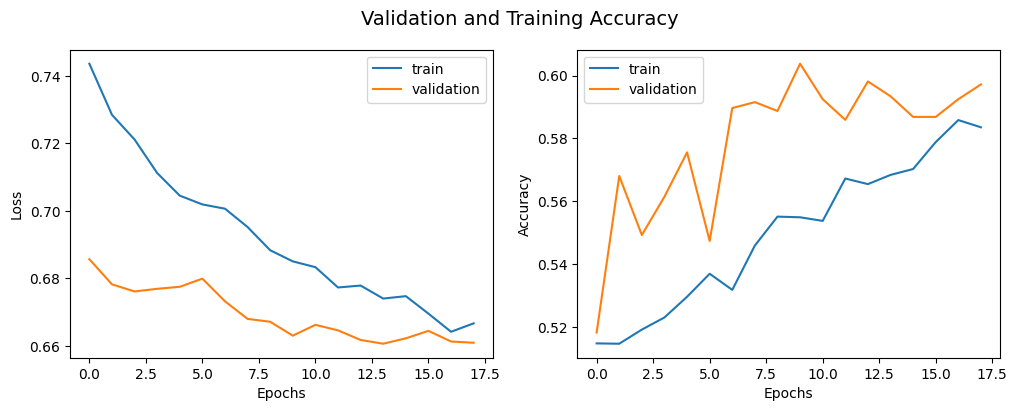

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4),dpi=100)
plt.suptitle("Training Curves",fontsize=16)
plt.subplot(1, 2, 1)
plt.suptitle("Validation and Training Loss",fontsize=14)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.subplot(1, 2, 2)
plt.suptitle("Validation and Training Accuracy",fontsize=14)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, recall_score,precision_score, confusion_matrix

predictions2 = model.predict(X_test2)

pred_labels2 = []

for x in predictions:
    if x >= 0.5:
        pred_labels2.append(1)
    else:
        pred_labels2.append(0)

test_accuracy = accuracy_score(y_test2,pred_labels2)
test_recall = recall_score(y_test2,pred_labels2)
print(f"Test Accuracy: {round(test_accuracy,3)}")
print(f"Test Recall: {round(test_recall,3)}")
print(f"Test Precision: {precision_score(y_test2,pred_labels2)}")

print("\nConfusion Matrix:\n",confusion_matrix(y_test2,pred_labels2))

84/84 [==============================] - 0s 1ms/step
Test Accuracy: 0.505
Test Recall: 0.246
Test Precision: 0.5093167701863354

Confusion Matrix:
 [[1015  316]
 [1003  328]]


<Figure size 10x10 with 0 Axes>

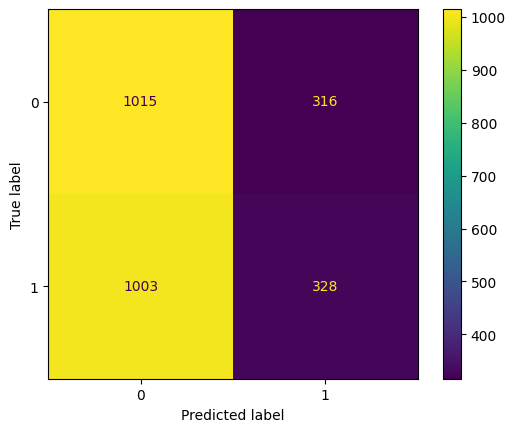

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize=(.1,.1))
#sns.heatmap(cm,cmap='plasma',annot=True)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test2,pred_labels2), display_labels = ['0', '1' ])
cm_display.plot()
plt.show()

##Veamos el score ROC-AUC

In [ ]:
from sklearn.metrics import roc_auc_score

predictions_matrix = model.predict(X_test2)
print(f"Shape de y_test: {y_test2.shape}")
print(f"Shape de las predicciones para el conjunto de prueba: {predictions_matrix.shape}")

roc_auc_score(y_test2,predictions_matrix)

84/84 [==============================] - 0s 1ms/step
Shape de y_test: (2662,)
Shape de las predicciones para el conjunto de prueba: (2662, 1)


0.6464222795602297